<a href="https://colab.research.google.com/github/Sahil-Shrivas/CatVSDog-Image-Classification-Project/blob/main/CatVSDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 95% 1.01G/1.06G [00:11<00:00, 73.0MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s] 


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [11]:
#generators agar dataset bahot bda hai to ek sath pure data pe kaam krna bahot muskhil hoskta hai esi liye dataset ko hum batches me divide karte hai with the help of generator. aur fir ek ek batch me kam karenge aur yeh jo generator hai vo hume keras provide karwata hai.

In [12]:
import tensorflow as tf
from tensorflow import keras

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
from keras.layers import MaxPooling2D, Input
# Create CNN Model
model = Sequential()

model.add(Input(shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 98ms/step - accuracy: 0.6151 - loss: 0.6554 - val_accuracy: 0.7446 - val_loss: 0.5285
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7579 - loss: 0.4946 - val_accuracy: 0.7902 - val_loss: 0.4456
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.8235 - loss: 0.3871 - val_accuracy: 0.8010 - val_loss: 0.4468
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8941 - loss: 0.2531 - val_accuracy: 0.7910 - val_loss: 0.5588
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9439 - loss: 0.1397 - val_accuracy: 0.8008 - val_loss: 0.7987
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9672 - loss: 0.0949 - val_accuracy: 0.7798 - val_loss: 0.8821
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9747 - loss: 0.0701 - val_accuracy: 0.7996 - val_loss: 1.0539
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9802 - loss: 0.0594 - 

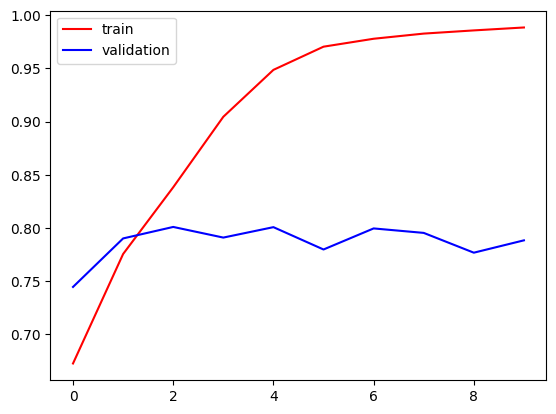

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

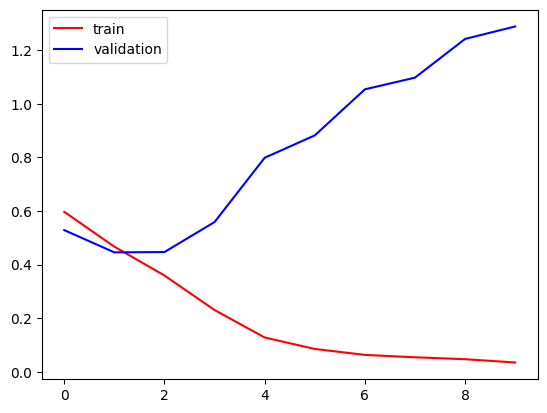

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

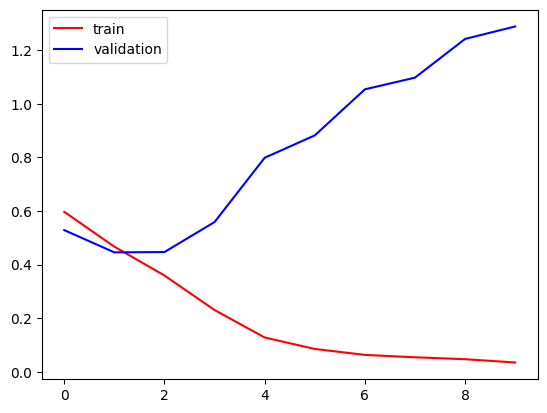

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [28]:
import os
import glob

# Path to the test dogs directory within the extracted dataset
test_dogs_dir = '/content/test/dogs'

test_img = None

if os.path.exists(test_dogs_dir):
    # Get a list of all dog images in the test directory
    dog_images = glob.glob(os.path.join(test_dogs_dir, '*.jpg'))

    if dog_images:
        # Pick the first dog image found for testing
        image_path_to_load = dog_images[0]
        print(f"Attempting to load image: {image_path_to_load}")
        test_img = cv2.imread(image_path_to_load)

        if test_img is None:
            print(f"Error: Could not load image from {image_path_to_load}. It might be corrupted.")
        else:
            # OpenCV reads images in BGR format, matplotlib expects RGB
            test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
            print("Image loaded successfully and converted to RGB.")
    else:
        print(f"Error: No dog images found in {test_dogs_dir}. Please check the directory contents.")
else:
    print(f"Error: Directory {test_dogs_dir} not found. Please ensure the dataset was extracted correctly.")

Attempting to load image: /content/test/dogs/dog.626.jpg
Image loaded successfully and converted to RGB.


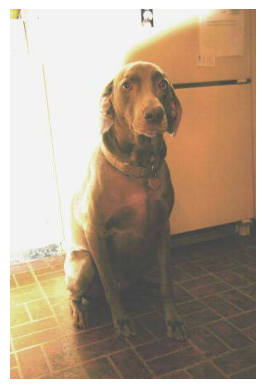

In [29]:
import matplotlib.pyplot as plt

if test_img is not None:
    plt.imshow(test_img)
    plt.axis('off') # Optional: hide axes for cleaner image display
    plt.show()
else:
    print("Cannot display image: 'test_img' is None. Please ensure an image was loaded successfully in the previous step.")

In [30]:
test_img.shape

(500, 332, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[9.765518e-16]], dtype=float32)